In [1]:
import pandas as pd
import numpy as np
import random
import math
from tqdm import tqdm

In [2]:
data = pd.read_csv('../data/cre/crx.csv')
feature_columns = ['f2','f3','f8','f14','f15']
for col in feature_columns:
    data[col] = pd.qcut(data[col], q=5, labels=False, duplicates='drop')
feature_columns = [ col for col in data.columns if col not in ['id','target']]
print(data[feature_columns].nunique())

f1      3
f2      5
f3      5
f4      4
f5      4
f6     15
f7     10
f8      5
f9      2
f10     2
f11    23
f12     2
f13     3
f14     5
f15     3
dtype: int64


In [3]:
print(feature_columns)

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15']


In [4]:
def calculate_equivalence_classes(data, condition_attrs):
    # 取出条件属性的列索引
    # 设置条件属性为索引
    # print(condition_attrs)
    data_indexed = data.set_index(condition_attrs)
    # 按照索引分组并将分组内结果合并为列表
    equivalence_classes = data_indexed.groupby(level=condition_attrs)[data.columns[0]].apply(list).to_dict()
    return equivalence_classes

In [5]:
def fitness_function(feature_columns,data,decision_attr):
    # 计算D的信息熵
    total_records = len(data)
    decision_counts = data[decision_attr].value_counts()
    decision_prob = decision_counts / total_records
    entropy_D = -(decision_prob * np.log2(decision_prob)).sum()

    equivalence_classes = calculate_equivalence_classes(data,feature_columns)
    equivalence_classes_dec = calculate_equivalence_classes(data, decision_attr)

    rule_confidences =0
    entropy_DB = 0
    count=0

    for equivalence_class in equivalence_classes.values():
           class_size = len(equivalence_class)
           max=0
           for key_decision in equivalence_classes_dec.keys():
               x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
               if len(x) / class_size >max:
                   max=len(x)/class_size
           y=1-max
           rule_confidences=rule_confidences+y
           count=count+1

    for equivalence_class in equivalence_classes.values():
        class_size = len(equivalence_class)
        class_prob = class_size / total_records
        for key_decision in equivalence_classes_dec.keys():
            x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
            if (len(x)>0):
                decision_prob = len(x) / class_size
                entropy_DB -= class_prob * decision_prob * math.log(decision_prob, 2)
    print(entropy_D-entropy_DB)
    avg_confidence = rule_confidences / count+0*(entropy_D-entropy_DB)
    return avg_confidence

In [6]:
feature_columns1=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15']
feature_columns2=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13']
feature_columns3=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']
feature_columns4=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']
feature_columns5=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
feature_columns6=['f1', 'f2', 'f3', 'f4', 'f5']
feature_columns7=['f1', 'f2', 'f3']
feature_columns8=['f1']

print(fitness_function(feature_columns8,data,'target'))

0.0025115743060598605
0.38561253561253556


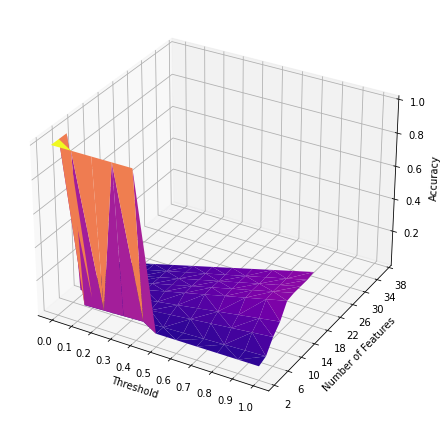

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y = [2, 4, 6, 8, 10, 12, 14, 16, 18]
X, Y = np.meshgrid(x, y)
data=np.array([
    [1, 1, 1, 1, 1, 0.06612989098935446, 0.06679329452687863, 0.06745669806440281, 0.06812010160192698, 0.06878350513945117, 0.06944690867697534]
,
    [1, 0.04558796700164617, 0.050214936017048406, 0.054841905032450636, 0.059468874047852865, 0.06409584306325511, 0.06872281207865734, 0.07334978109405957, 0.0779767501094618, 0.08260371912486403, 0.08723068814026627],
    [1, 0.05153123283233211, 0.0638345731541185, 0.0761379134759049, 0.0884412537976913, 0.1007445941194777, 0.1130479344412641, 0.12535127476305047, 0.1376546150848369, 0.14995795540662327, 0.16226129572840967],
    [0.026723852621797592, 0.045404113410504154, 0.0640843741992107, 0.08276463498791725, 0.10144489577662383, 0.12012515656533038, 0.13880541735403693, 0.1574856781427435, 0.17616593893145005, 0.1948461997201566, 0.21352646050886315],
    [0.012034287034287034, 0.04060683942629068, 0.06917939181829433, 0.09775194421029798, 0.12632449660230163, 0.15489704899430526, 0.1834696013863089, 0.21204215377831254, 0.24061470617031622, 0.2691872585623199, 0.2977598109543235],
        [0.00914901017851233, 0.03882950337868512, 0.06850999657885791, 0.09819048977903068, 0.1278709829792035, 0.15755147617937626, 0.18723196937954903, 0.21691246257972183, 0.24659295577989462, 0.2762734489800674, 0.3059539421802402],
    [0.00914901017851233, 0.03882950337868512, 0.06850999657885791, 0.09819048977903068, 0.1278709829792035, 0.15755147617937626, 0.18723196937954903, 0.21691246257972183, 0.24659295577989462, 0.2762734489800674, 0.3059539421802402],
[0.00914901017851233, 0.03882950337868512, 0.06850999657885791, 0.09819048977903068, 0.1278709829792035, 0.15755147617937626, 0.18723196937954903, 0.21691246257972183, 0.24659295577989462, 0.2762734489800674, 0.3059539421802402],
[0.005445898647152924, 0.036345810384644864, 0.0672457221221368, 0.09814563385962873, 0.12904554559712067, 0.1599454573346126, 0.19084536907210453, 0.22174528080959646, 0.25264519254708845, 0.2835451042845804, 0.3144450160220723]

])

fig = plt.figure(figsize=(6,6))  # Set the size of the figure in inches
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), data.flatten(), cmap='plasma')

# Set the axis labels
ax.set_xlabel('Threshold')
ax.set_ylabel('Number of Features')
ax.set_zlabel('Accuracy')

# Customize the tick labels
x_ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y_ticks = [2, 6, 10, 14, 18, 22, 26, 30, 34, 38]
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Save the plot in IEEE format
plt.tight_layout()
plt.savefig('test2.png', bbox_inches='tight',dpi=300)

# Show the plot in the console
plt.show()

